<a href="https://colab.research.google.com/github/Madihajavaid12345/task-2-prodigy-InfoTech-internship/blob/main/Task%E2%80%9102_Data_Cleaning_%26_EDA_prodigy_infotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📝 Task 2 – Titanic Dataset: Data Cleaning & EDA  
**Submitted by:** Madiha Rehan  

**Objective:**  
Clean the dataset by addressing missing values, engineer meaningful features, and explore relationships between variables to uncover patterns affecting survival.

---

### ✅ What I Did:
1. **Loaded** the Titanic dataset (`train.csv`) using pandas.  
2. **Cleaned missing data**:
   - Filled missing **Age** with median age  
   - Filled missing **Embarked** with the mode  
   - Dropped **Cabin** due to excessive missing values  
3. **Engineered new features**:
   - `FamilySize` = `SibSp` + `Parch` + 1  
   - `IsAlone` = 1 if traveling alone, otherwise 0  
4. **Explored patterns** using visualizations:
   - Survival rates by **sex**, **passenger class**, **family size**, and **embarkation port**  
   - Distribution of **age** and **fare**, including relationships with survival  
5. **Derived key insights** into how demographics and socio-economic factors influenced survival.

---

### 🔧 Tools Used:
- Python 🐍  
- pandas, matplotlib, seaborn  
- Google colab

---

### 🧩 Summary Outcomes:
- Cleaned dataset with no missing values for core analysis  
- Feature engineering to better capture family and travel context  
- Insights:
  - Females and children had noticeably higher survival rates  
  - First-class passengers were more likely to survive  
  - Larger families and higher fare were positively correlated with survival

---

*Scroll down to see the full code and detailed visualizations…*


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Apply a clean seaborn style
sns.set_style('darkgrid')


In [ ]:
# load the Titanic dataset
df = pd.read_csv('/content/titanic  datasset.csv')

In [ ]:
# initial look
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [ ]:
# clean missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

/tmp/ipython-input-6-2816576657.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-6-2816576657.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
#Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

Exploratory Data Analysis

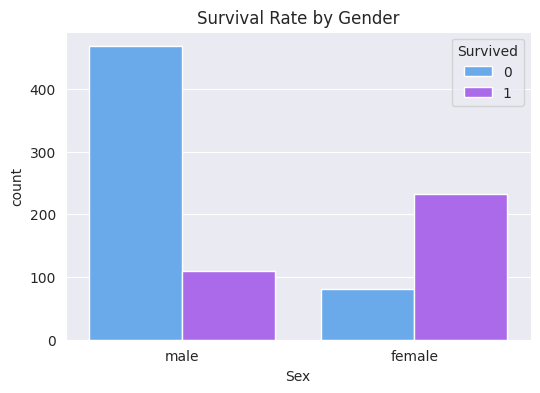

In [ ]:
# Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived', palette='cool')
plt.title('Survival Rate by Gender')
plt.show()

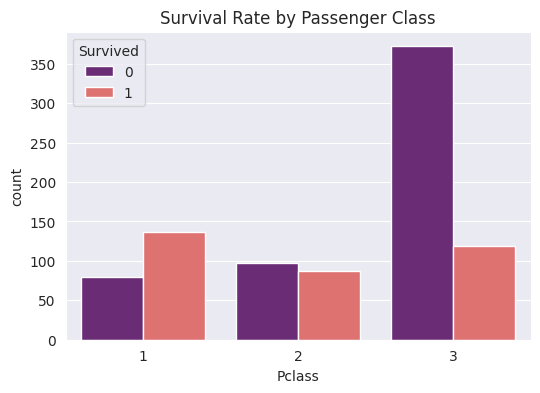

In [ ]:
# Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='magma')
plt.title('Survival Rate by Passenger Class')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

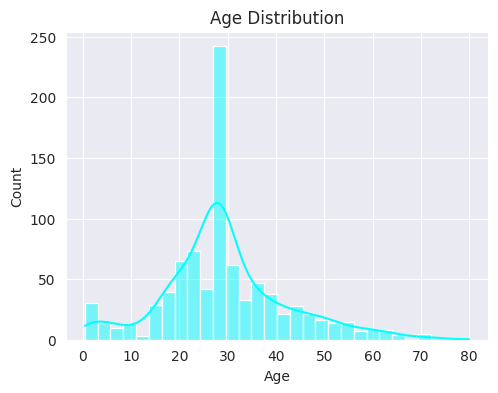

In [ ]:
# Age distribution & relationship with survival
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Age', bins=30, kde=True, color='cyan')
plt.title('Age Distribution')


/tmp/ipython-input-20-4234011704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette='Set3')


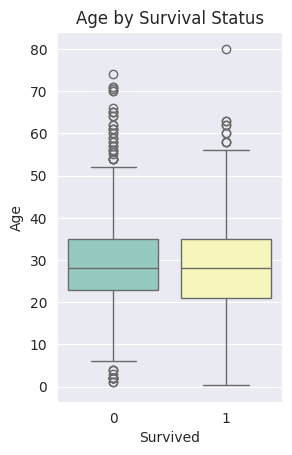

In [ ]:
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Survived', y='Age', palette='Set4')
plt.title('Age by Survival Status')
plt.show()

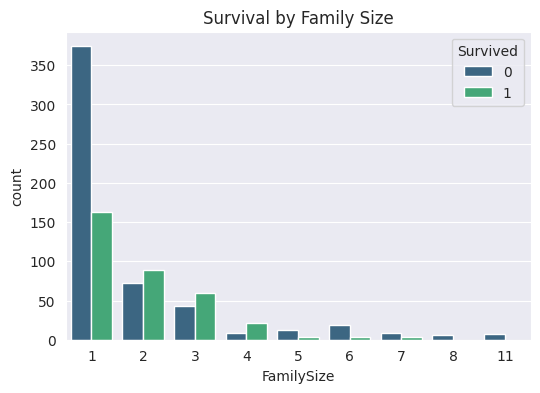

In [ ]:
 # Family size impact
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='FamilySize', hue='Survived', palette='viridis')
plt.title('Survival by Family Size')
plt.show()

Text(0.5, 1.0, 'Fare by Embarkation & Survival')

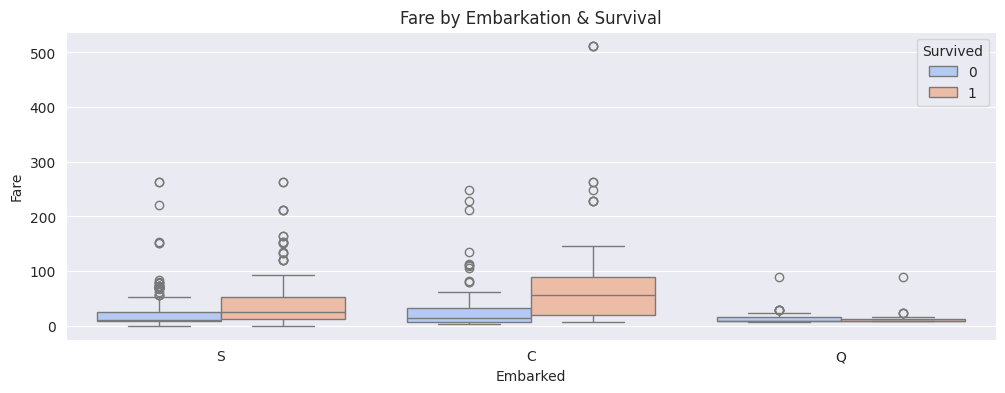

In [ ]:

# Fare distribution by embarkation and survival
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='Embarked', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Fare by Embarkation & Survival')